In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Car Sale.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [3]:
df.shape

(23906, 16)

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [6]:
df.sample(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
17432,C_CND_017433,9/2/2023,Erwan,Female,620000,U-Haul CO,Nissan,Xterra,DoubleÂ Overhead Camshaft,Auto,Black,26001,78758-7841,Passenger,8782851,Austin
15379,C_CND_015380,6/30/2023,Eli,Male,753000,Classic Chevy,Mercury,Cougar,Overhead Camshaft,Manual,Pale White,28000,85257-3102,Hatchback,8331879,Scottsdale


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [9]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [10]:
df.rename(columns = {"Price ($)":"Price"},inplace = True)

In [11]:
avg_selling_price = df.groupby("Dealer_Name")["Price"].mean().reset_index()

In [12]:
avg_selling_price.rename(columns = {"Price":"Avg_price"},inplace = True)

In [13]:
avg_selling_price

,Dealer_Name,Avg_price
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


In [14]:
sorted_avg_selling_price = avg_selling_price.sort_values(by = "Avg_price", ascending = False)

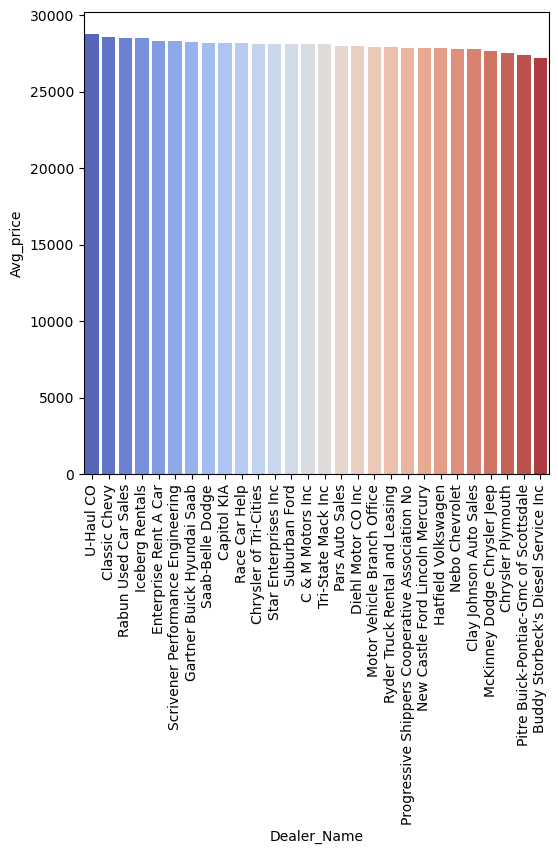

In [15]:
plt.figure(figsize = (6,6))
sns.barplot(x = sorted_avg_selling_price.Dealer_Name,y = sorted_avg_selling_price.Avg_price,palette = "coolwarm")
plt.xticks(rotation = 90)
plt.show()

In [16]:
# 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [17]:
price_variation = df.groupby('Company')['Price'].sum().reset_index()
price_variation.rename(columns = {"Price":"sum_of_price"},inplace = True)

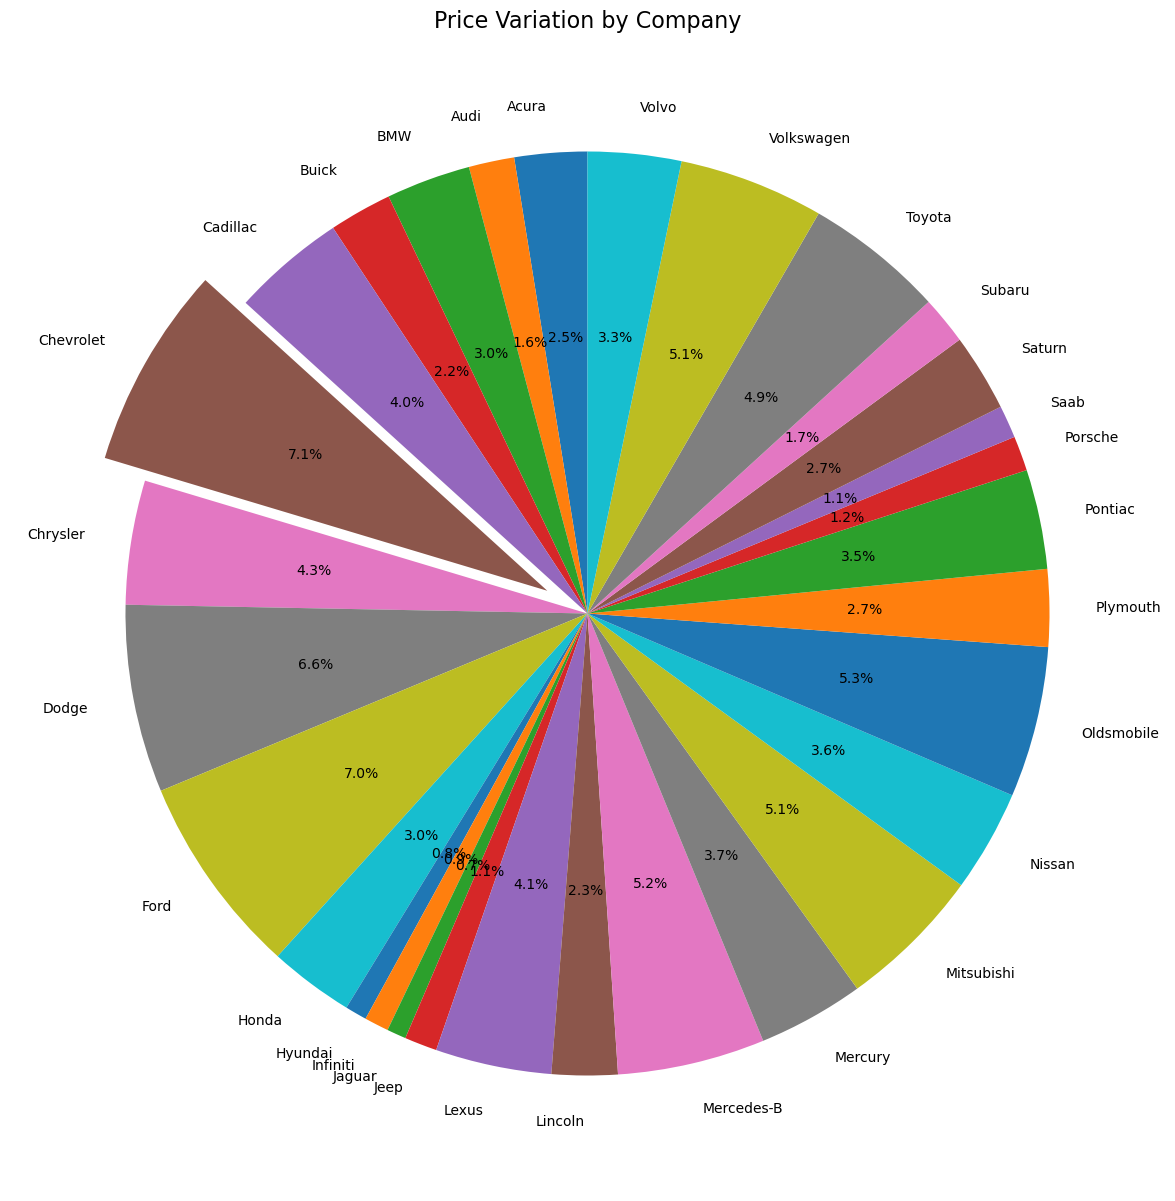

In [18]:

plt.figure(figsize=(15, 15))  # Set the figure size (width=12, height=8 in inches)
plt.pie(
    x=price_variation['sum_of_price'],  # Numerical values for the pie chart
    labels=price_variation['Company'],  # Labels for the slices
    autopct='%1.1f%%',  # Display percentages on slices
    startangle=90,  # Start the pie chart at 90 degrees
    explode=[0.1 if i == max(price_variation['sum_of_price']) else 0 for i in price_variation['sum_of_price']]  # Optional: Explode the largest slice
)
plt.title('Price Variation by Company', fontsize=16)  # Add a larger title
plt.show()


In [19]:
#chevrolet has highest variation

In [20]:
#>3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

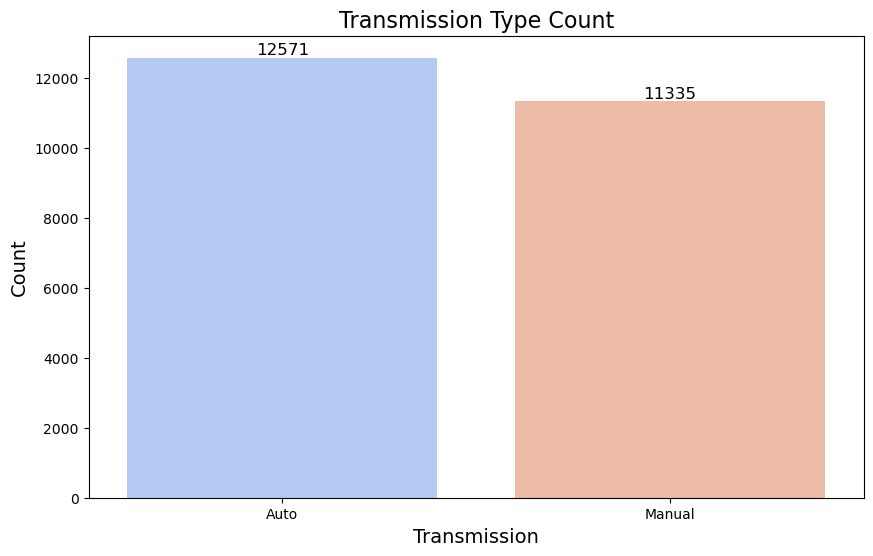

In [21]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
ax = sns.countplot(x=df['Transmission'], palette='coolwarm')  # Create the countplot

# Add values on top of the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position of the text
        bar.get_height(),  # Y position of the text (height of the bar)
        f'{int(bar.get_height())}',  # Text to display (height of the bar as an integer)
        ha='center',  # Center the text horizontally
        va='bottom',  # Align the text vertically
        fontsize=12  # Font size
    )

plt.title('Transmission Type Count', fontsize=16)  # Add a title
plt.xlabel('Transmission', fontsize=14)  # Label the x-axis
plt.ylabel('Count', fontsize=14)  # Label the y-axis
plt.show()

In [22]:
#4 What is the distribution of car prices across different regions

In [23]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price             int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [24]:
data = df.groupby("Dealer_Region")["Price"].sum().reset_index()

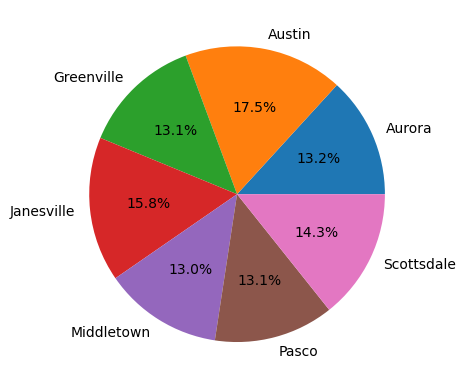

In [25]:
plt.pie(x = data.Price,labels = data.Dealer_Region, autopct = "%1.1f%%")
plt.show()

In [26]:
#5 What is the distribution of cars based on body styles

In [27]:
df.groupby("Body Style")["Car_id"].count()

Body Style
Hardtop      2971
Hatchback    6128
Passenger    3945
SUV          6374
Sedan        4488
Name: Car_id, dtype: int64

In [28]:
#6 How does the average selling price of cars vary by customer gender and annual income

In [29]:
data = df.groupby(["Gender","Annual Income"])["Price"].mean().reset_index()

<Axes: xlabel='Price', ylabel='Annual Income'>

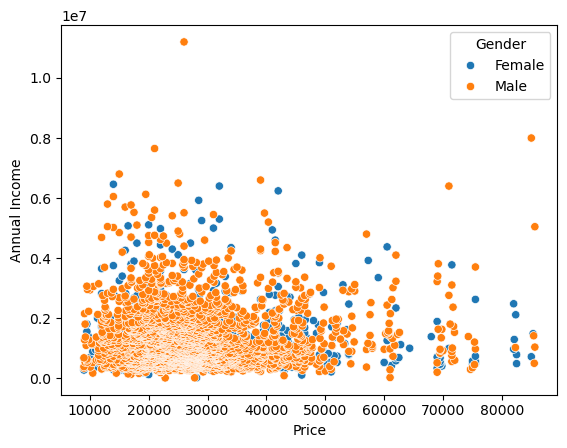

In [30]:
sns.scatterplot(x = data.Price, y = data["Annual Income"],hue = data.Gender )

In [31]:
#7 What is the distribution of car prices by region, and how does the number of cars sold vary by region

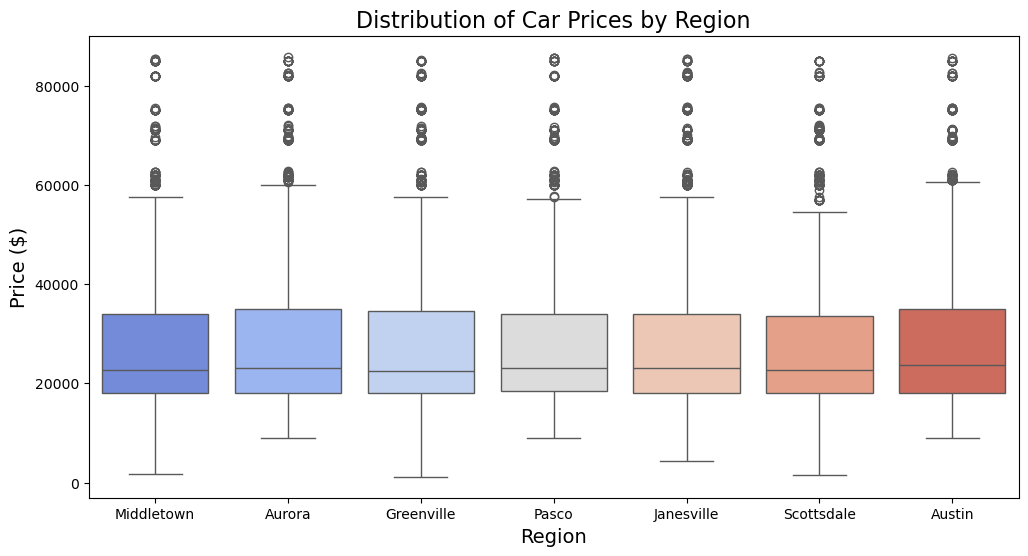

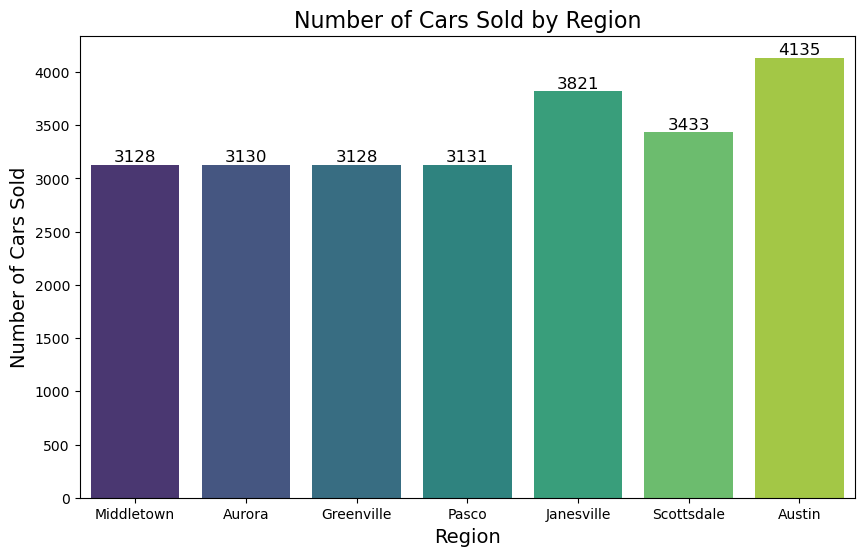

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price', data=df, palette='coolwarm')
plt.title('Distribution of Car Prices by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.show()
 
# 2. Number of Cars Sold by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Dealer_Region', data=df, palette='viridis')
plt.title('Number of Cars Sold by Region', fontsize=16)

# Add count values on top of bars
ax = plt.gca()
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)
plt.show()

In [33]:
#8 How does the average car price differ between cars with different engine sizes

In [34]:
df.groupby("Engine")["Price"].mean()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price, dtype: float64

In [35]:
#9 How do car prices vary based on the customer’s annual income bracket

<Axes: xlabel='Annual Income', ylabel='Price'>

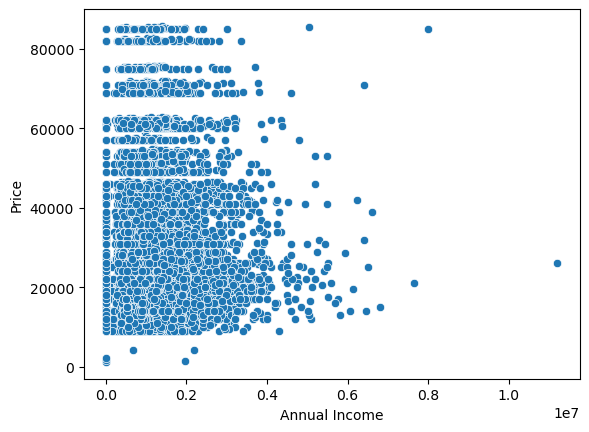

In [36]:
sns.scatterplot(x = "Annual Income",y = "Price",data = df)

In [37]:
# even if annual income increased still the same price for the car

In [38]:
#10 What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [39]:
datas = df.groupby("Model")["Price"].agg(["count","sum"])
datas.rename(columns = {"count":"total_sales","sum":"total_price"},inplace = True)

In [40]:
datas.sort_values(by = "total_sales",ascending = False)[:5]

,total_sales,total_price
Model,,
Diamante,418,9308151
Silhouette,411,12271849
Prizm,411,9386606
Passat,391,7663885
Ram Pickup,383,10655391


In [41]:
#11 How does car price vary with engine size across different car colors, and which colors have the highest price variation

In [42]:
data=df.groupby(["Engine","Color"])["Price"].sum().reset_index()

In [43]:
data

,Engine,Color,Price
0,DoubleÂ Overhead Camshaft,Black,107497634
1,DoubleÂ Overhead Camshaft,Pale White,179083474
2,DoubleÂ Overhead Camshaft,Red,68531112
3,Overhead Camshaft,Black,116935984
4,Overhead Camshaft,Pale White,130275196
5,Overhead Camshaft,Red,69202065


In [44]:
#12  Is there any seasonal trend in car sales based on the date of sale

In [45]:
data = df.groupby("Date")["Price"].sum().sort_values(ascending = False)[:10].reset_index()

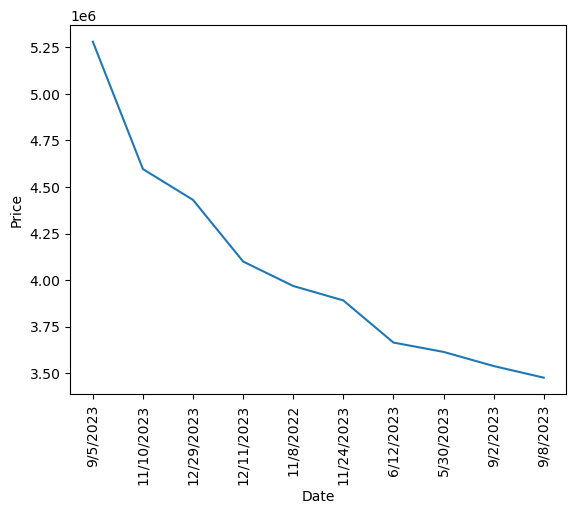

In [46]:
sns.lineplot(x = data.Date,y = data.Price)
plt.xticks(rotation = 90)
plt.show()

In [47]:
#most sale on 9/5/2023

In [48]:
#13 How does the car price distribution change when considering different combinations of body style and transmission type

In [107]:
df.groupby(["Transmission","Body Style"])["Price"].sum().reset_index()

,Transmission,Body Style,Price
0,Auto,Hardtop,44380425
1,Auto,Hatchback,89598664
2,Auto,Passenger,58409987
3,Auto,SUV,84869334
4,Auto,Sedan,77853810
5,Manual,Hardtop,42227483
6,Manual,Hatchback,76635810
7,Manual,Passenger,55766328
8,Manual,SUV,85747815
9,Manual,Sedan,56035809


<Axes: xlabel='Body Style', ylabel='Price'>

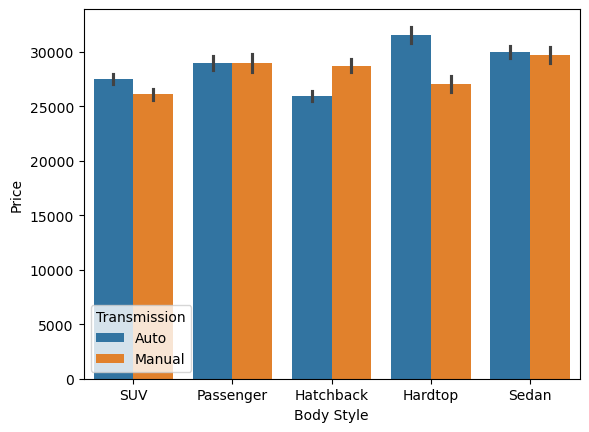

In [113]:
sns.barplot(x= df["Body Style"],y = df["Price"],hue = df["Transmission"])

In [115]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

In [158]:
df.Engine.unique()

array([1, 0], dtype=int64)

In [156]:
df["Engine"].replace({"DoubleÂ\xa0Overhead Camshaft":1,"Overhead Camshaft":0},inplace = True)

<Axes: >

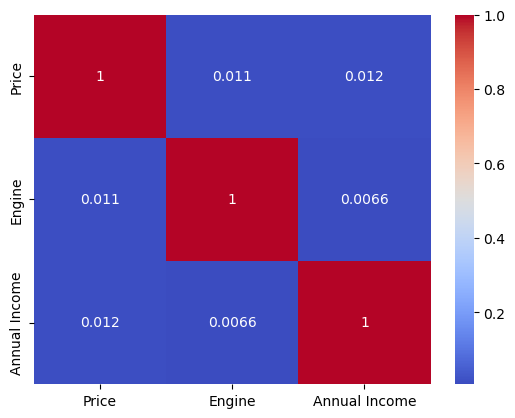

In [164]:
sns.heatmap(df[["Price","Engine","Annual Income"]].corr(),cmap= "coolwarm",annot = True)

In [166]:
#engine and annual Income almost same positivily corelated to Price , engine and annual income not much correlated to each other

In [169]:
#15 How does the average car price vary across different car models and engine types?

In [182]:
data = df.groupby(["Engine","Model"])["Price"].mean().reset_index()
data

,Engine,Model,Price
0,0,3000GT,21770.659864
1,0,323i,21038.162162
2,0,328i,38676.177215
3,0,4Runner,25075.416667
4,0,5-Sep,28071.454545
...,...,...,...
256,1,Viper,32118.479167
257,1,Voyager,22066.026316
258,1,Windstar,25145.636364
259,1,Wrangler,21145.294737


<Axes: xlabel='Engine', ylabel='Price'>

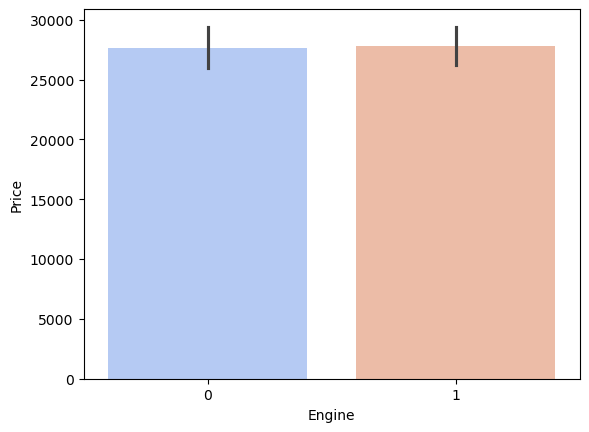

In [192]:
sns.barplot(x = data.Engine,y = data.Price,palette = "coolwarm")